In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [ ]:
# Database connection
user = 'root'
password = '123'
host = '127.0.0.1'
port = 3306
database = 'project_db'

In [3]:
# Create SQLAlchemy engine
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")

In [4]:
query = """
SELECT region, month, price, 'Regular' AS fuel_type FROM regular_gas_prices_canada
UNION ALL
SELECT region, month, price, 'Premium' AS fuel_type FROM premium_gas_prices_canada
UNION ALL
SELECT region, month, price, 'Diesel' AS fuel_type FROM diesel_prices_canada;
"""

In [5]:
df_combined = pd.read_sql(query, engine)


In [7]:
# Convert the 'month' column to a datetime format for proper time series analysis
df_combined['month'] = pd.to_datetime(df_combined['month'], format='%Y-%m')


In [8]:
# Calculate monthly average price for each fuel type
monthly_avg_prices = df_combined.groupby(['month', 'fuel_type'])['price'].mean().reset_index()


<Axes: xlabel='month', ylabel='price'>

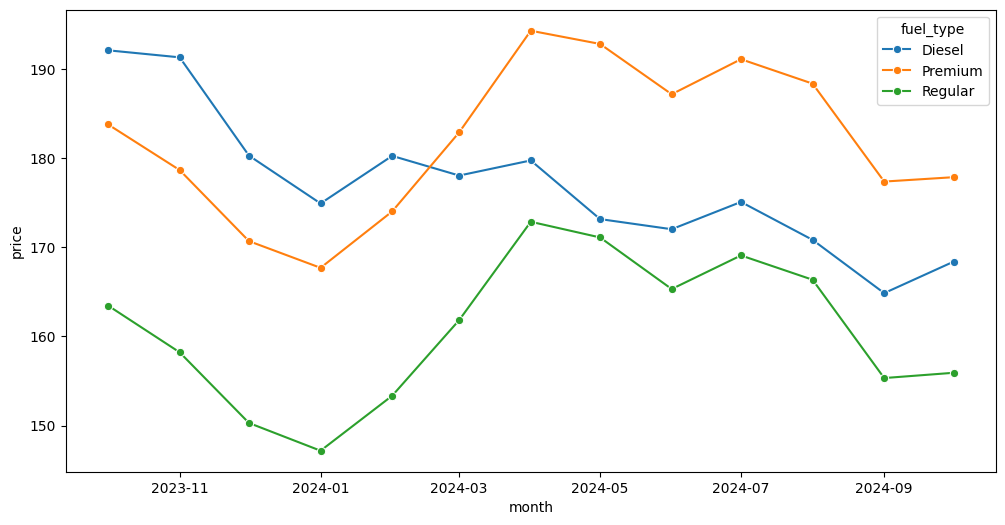

In [9]:
# Plot the time trend for each fuel type
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg_prices, x='month', y='price', hue='fuel_type', marker='o')